<a href="https://colab.research.google.com/github/karoldem/comicfinder/blob/master/new_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr
import easyocr
reader = easyocr.Reader(['en'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.8 MB/s eta 0:00:00


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [2]:
result = reader.readtext('https://imgs.xkcd.com/comics/iceberg.png')

Progress: |██████████████████████████████████████████████████████████████████████| 140.8% Complete

Progress: |██████████████████████████████████████████████████████████████████████| 140.8% Complete

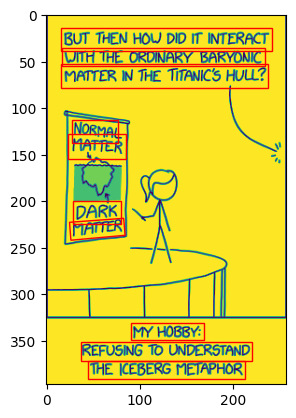

[([[16, 14], [242, 14], [242, 38], [16, 38]],
  'But THEN HOU DID IT INTERACT',
  0.5302930495349351),
 ([[17, 35], [235, 35], [235, 55], [17, 55]],
  'UITh THE ORDINARY BARYONIC',
  0.35056608560412617),
 ([[16, 52], [238, 52], [238, 78], [16, 78]],
  'MATTER IN THE TITANICS HULL?',
  0.4298277862131333),
 ([[27, 113], [77, 113], [77, 137], [27, 137]], 'NORMAL', 0.9393927569490526),
 ([[23, 128], [85, 128], [85, 154], [23, 154]], 'NATTER', 0.9345287858654616),
 ([[28, 200], [80, 200], [80, 224], [28, 224]], 'DARK', 0.9995521306991577),
 ([[91, 331], [169, 331], [169, 349], [91, 349]],
  'MY HOBBY:',
  0.9256055240630308),
 ([[37, 351], [221, 351], [221, 371], [37, 371]],
  'REFUSING TO UNDERSTAND',
  0.6984198535074471),
 ([[45, 371], [213, 371], [213, 391], [45, 391]],
  'THE ICEBERG METAPHOR',
  0.8253844216567787),
 ([[24.654654412007375, 222.52011985320812],
   [82.84718332700004, 218.23324465671698],
   [84.34534558799263, 236.47988014679188],
   [26.152816672999965, 241.76675534

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import requests
from io import BytesIO

url = 'https://imgs.xkcd.com/comics/iceberg.png'
result = reader.readtext(url)
response = requests.get(url)
im = Image.open(BytesIO(response.content))

fig, ax = plt.subplots()
ax.imshow(im)

for i in result:
    ax.add_patch(patches.Polygon(i[0], linewidth=1, edgecolor='r', facecolor='none'))

plt.show()
result

In [4]:
result[1][0]

[[17, 35], [235, 35], [235, 55], [17, 55]]

In [5]:
from sympy import Point, Polygon

p1, p2, p3, p4 = map(Point, result[0][0])
p5, p6, p7, p8 = map(Point, result[1][0])

poly1 = Polygon(p1, p2, p3, p4)
poly2 = Polygon(p5, p6, p7, p8)

isIntersection = poly1.intersection(poly2)

print(isIntersection)

[Point2D(17, 38), Point2D(235, 38)]


Progress: |██████████████████████████████████████████████████████████████████████| 140.8% Complete

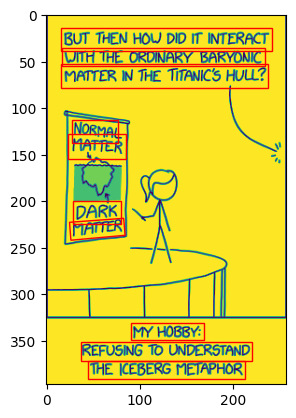

Progress: |██████████████████████████████████████████████████████████████████████| 140.8% Complete

([[[16, 242, 14, 38],
   [17, 235, 35, 55],
   [16, 238, 52, 78],
   [27, 77, 113, 137],
   [23, 85, 128, 154],
   [28, 80, 200, 224],
   [91, 169, 331, 349],
   [37, 221, 351, 371],
   [45, 213, 371, 391]]],
 [[[[24.654654412007375, 222.52011985320812],
    [82.84718332700004, 218.23324465671698],
    [84.34534558799263, 236.47988014679188],
    [26.152816672999965, 241.76675534328302]]]])

In [6]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import requests
from io import BytesIO

url = 'https://imgs.xkcd.com/comics/iceberg.png'
result = reader.readtext(url)
response = requests.get(url)
im = Image.open(BytesIO(response.content))

fig, ax = plt.subplots()
ax.imshow(im)

for i in result:
    ax.add_patch(patches.Polygon(i[0], linewidth=1, edgecolor='r', facecolor='none'))

plt.show()

reader.detect(url)

In [7]:
r = reader.detect(url)

Progress: |██████████████████████████████████████████████████████████████████████| 140.8% Complete

In [8]:
r[0].sort( key = lambda x: x[0])
r[0]

[[[16, 242, 14, 38],
  [17, 235, 35, 55],
  [16, 238, 52, 78],
  [27, 77, 113, 137],
  [23, 85, 128, 154],
  [28, 80, 200, 224],
  [91, 169, 331, 349],
  [37, 221, 351, 371],
  [45, 213, 371, 391]]]

Triangle(Point2D(86, 62), Point2D(10, 94), Point2D(63, 14))


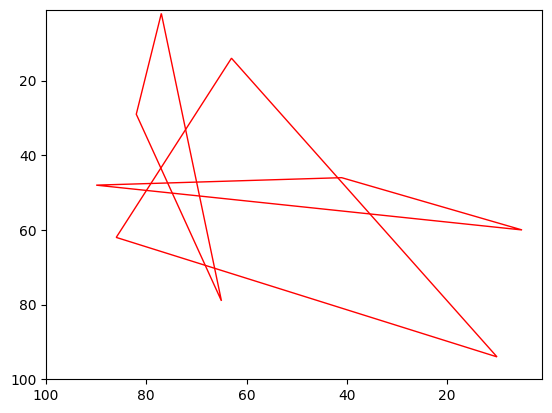

4.744529724121094e-05


[(2, False, 65, 82, 1),
 (14, False, 10, 86, 0),
 (46, False, 5, 90, 2),
 (60, True, 5, 90, 2),
 (79, True, 65, 82, 1),
 (94, True, 10, 86, 0)]

In [9]:
from sympy import Ray, Circle, intersection
from time import time
from random import randint
from bisect import insort


p1, p2, p3, p4 = map(Point, result[0][0])
p5, p6, p7, p8 = map(Point, result[1][0])

poly1 = Polygon(p1, p2, p3, p4)
poly2 = Polygon(p5, p6, p7, p8)

poly = []
p = []

for i in range(3):
    p2, p3, p4 = map(Point, [ [randint(0,100), randint(0,100)], [randint(0,100), randint(0,100)], [randint(0,100), randint(0,100)]] )
    p.append((p2, p3, p4))
    poly.append(Polygon(p2, p3, p4))


fig, ax = plt.subplots()
print(poly[0])
for i in p:
    ax.add_patch(patches.Polygon(i, linewidth=1, edgecolor='r', facecolor='none'))
plt.xlim(100)
plt.ylim(100)

plt.show()



def frame(p):
    xmin = xmax = p.args[0].args[0]
    ymax = ymin = p.args[0].args[1]

    for i in p.args:
        if i.args[0] > xmax: xmax = i.args[0]
        elif i.args[0] < xmin: xmin = i.args[0]
        if i.args[1] > ymax: ymax = i.args[1]
        elif i.args[1] < ymin: ymin = i.args[1]

    return xmin, xmax, ymin, ymax


polyID = [(frame(i)) + (id,) for id,i in enumerate(poly)]
polyID = [(i[2], False, i[0], i[1], i[4]) for i in polyID] + [(i[3], True, i[0], i[1], i[4]) for i in polyID]
polyID.sort()

previous = polyID[0]




t = time()
#intersection(*tuple(poly))
print(time() - t)

#intersection(*tuple(poly), pairwise = True)
polyID

In [14]:
for i in [1,2,3][1:]:
    print(i)

2
3


In [12]:
from sympy import Point, Polygon, intersection

p1, p2, p3, p4 = map(Point, result[0][0])
p5, p6, p7, p8 = map(Point, result[1][0])

poly1 = Polygon(p1, p2, p3, p4)
poly2 = Polygon(p5, p6, p7, p8)


def frame(p):
    xmin = xmax = p.args[0].args[0]
    ymax = ymin = p.args[0].args[1]

    for i in p.args:
        if i.args[0] > xmax: xmax = i.args[0]
        elif i.args[0] < xmin: xmin = i.args[0]
        if i.args[1] > ymax: ymax = i.args[1]
        elif i.args[1] < ymin: ymin = i.args[1]

    return xmin, xmax, ymin, ymax

for i in poly1.args:
    print(i)

print('')
print (frame(poly1))


Point2D(16, 14)
Point2D(242, 14)
Point2D(242, 38)
Point2D(16, 38)

(16, 242, 14, 38)


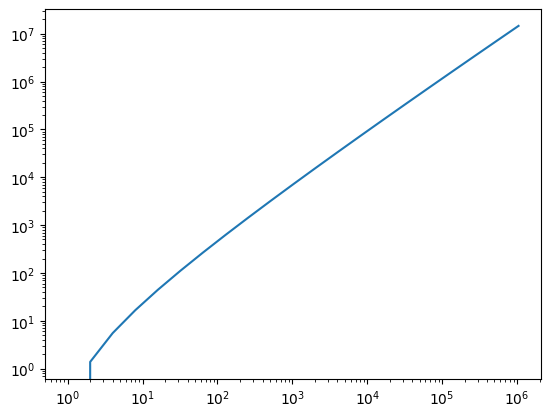

In [13]:
from math import log
import matplotlib.pyplot as plt

x,y= [],[]
for i in range (21):
    n = 2**i
    x.append(n)
    y.append(n*log(n))
plt.yscale("log")
plt.xscale("log")
plt.plot(x,y)